# Graded Challenge 4 Phase 1
___
___
Nama    : Ali Aufa Fakhri

Batch   : 019

---
---

# 1. Perkenalan

## Latar Belakang

Bank seringkali menghadapi tantangan dalam memahami perilaku penggunaan kartu kredit oleh nasabah mereka. Memahami pola dan kecenderungan penggunaan kartu kredit dapat membantu bank untuk menawarkan produk dan layanan yang lebih tepat sasaran, meningkatkan retensi nasabah, serta mengoptimalkan strategi pemasaran dan penawaran kredit.

Dalam konteks ini, permasalahan yang dihadapi adalah bagaimana melakukan segmentasi pelanggan (customer segmentation) berdasarkan data penggunaan kartu kredit selama 6 bulan terakhir. Segmentasi pelanggan akan membantu bank dalam mengidentifikasi kelompok pelanggan dengan perilaku penggunaan kartu kredit yang serupa. Dengan melakukan segmentasi, bank dapat memahami preferensi dan kebutuhan kelompok pelanggan yang berbeda secara lebih baik, sehingga dapat mengembangkan strategi yang lebih efektif dalam memenuhi kebutuhan mereka.

## Problem Statement
membuat model clustering untuk melakukan segmentasi pelanggan berdasarkan data penggunaan kartu kredit selama 6 bulan terakhir dengan tujuan meningkatkan pemahaman perilaku pelanggan dan efektivitas strategi pemasaran bank.

## Query Dataset

Dataset yang digunakan diambil dengan query sebagai berikut:

~~~~sql
SELECT * FROM `ftds-hacktiv8-project.phase1_ftds_019_rmt.credit-card-information`
WHERE MOD(CUST_ID,2) != 0
~~~~

Dataset yang diberikan merangkum perilaku penggunaan sekitar 9.000 pemegang kartu kredit aktif selama 6 bulan terakhir. Data tersebut mencakup 18 variabel perilaku pada tingkat pelanggan. Berikut ini adalah penjelasan variabel untuk dataset Kartu Kredit:

| Variabel                      | Deskripsi                                                           |
|-----------------------------------|-----------------------------------------------------------------------|
| CUST_ID                           | ID pemegang kartu kredit                                              |
| BALANCE                           | Sisa saldo rekening yang tersedia untuk pembelian                     |
| BALANCE_FREQUENCY                 | Frekuensi pembaruan saldo (antara 0 dan 1)                            |
| PURCHASES                         | Jumlah pembelian akun                                                |
| ONEOFF_PURCHASES                  | Jumlah pembelian maksimum dalam satu transaksi                         |
| INSTALLMENTS_PURCHASES            | Jumlah pembelian dalam angsuran                                       |
| CASH_ADVANCE                      | Pembayaran muka pengguna dalam bentuk tunai                            |
| PURCHASES_FREQUENCY               | Frekuensi pembelian secara teratur                                    |
| ONEOFF_PURCHASES_FREQUENCY        | Frekuensi pembelian dalam satu transaksi                              |
| PURCHASES_INSTALLMENTS_FREQUENCY  | Frekuensi pembelian dalam angsuran                                    |
| CASH_ADVANCE_FREQUENCY            | Frekuensi penarikan tunai                                             |
| CASH_ADVANCE_TRX                  | Total transaksi "pembayaran muka tunai"                               |
| PURCHASES_TRX                     | Total transaksi pembelian                                             |
| CREDIT_LIMIT                      | Batas kredit kartu pengguna                                           |
| PAYMENTS                          | Jumlah total yang dibayarkan oleh pengguna                            |
| MINIMUM_PAYMENTS                  | Jumlah pembayaran minimum yang dibayarkan oleh pengguna                |
| PRC_FULL_PAYMENT                  | Persentase total tagihan yang dibayarkan oleh pengguna                 |
| TENURE                            | Lama pelayanan kartu kredit untuk pengguna                             |

# 2. Import Library

Library yang digunakan dalam assignment ini

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Pipeline
from sklearn.pipeline import Pipeline

# preprocess
from feature_engine.outliers import Winsorizer # Caping
from sklearn.preprocessing import MinMaxScaler

# multicollinearity
from statsmodels.stats.outliers_influence import variance_inflation_factor

# PCA
from sklearn.decomposition import PCA

# elbow & silhouette for PCA
from yellowbrick.cluster import KElbowVisualizer
from yellowbrick.cluster import SilhouetteVisualizer
from sklearn.metrics import silhouette_score

# cluster
from sklearn.cluster import KMeans

import warnings
warnings.filterwarnings('ignore')

# 3. Data Loading



In [2]:
# Me-loading data
df = pd.read_csv('h8dsft_P1G4__ali_aufa.csv')
pd.set_option('display.max_columns', None)

In [3]:
# Menampilkan 10 data teratas
df.head(10)

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,3091,3.833185,0.125000,45.00,45.00,0.00,0.0,0.125,0.125,0.00,0.0,0,1,500.0,0.000000,NaN,0.000000,8
1,5069,0.000000,0.000000,176.03,176.03,0.00,0.0,0.125,0.125,0.00,0.0,0,1,7000.0,0.000000,NaN,0.000000,8
2,6075,757.964752,0.875000,157.40,157.40,0.00,0.0,0.125,0.125,0.00,0.0,0,6,1200.0,1494.480376,2638.598410,0.000000,8
3,6291,264.566591,0.375000,1150.00,1150.00,0.00,0.0,0.125,0.125,0.00,0.0,0,1,1200.0,3029.380326,85.428885,0.000000,8
4,7755,440.613643,1.000000,600.00,600.00,0.00,0.0,0.125,0.125,0.00,0.0,0,1,1000.0,215.316424,137.846006,0.000000,8
5,8299,611.561026,1.000000,765.00,765.00,0.00,0.0,0.125,0.125,0.00,0.0,0,1,2000.0,204.464151,146.352314,0.000000,8
6,8629,0.228572,0.125000,60.00,60.00,0.00,0.0,0.125,0.125,0.00,0.0,0,1,1500.0,438.738982,NaN,0.000000,8
7,8805,105.333584,0.375000,306.00,306.00,0.00,0.0,0.125,0.125,0.00,0.0,0,2,6000.0,101.986927,118.324082,0.000000,8
8,7,16.379412,0.454545,178.15,0.00,178.15,0.0,0.250,0.000,0.25,0.0,0,3,5000.0,229.376368,89.613822,0.181818,12
9,91,559.151424,1.000000,94.00,94.00,0.00,0.0,0.250,0.250,0.00,0.0,0,3,5500.0,254.733329,218.279194,0.000000,12


In [4]:
# Menampilkan 10 data terbawah
df.tail(10)

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
4465,6809,4438.521324,1.000000,591.84,109.16,482.68,564.365429,0.636364,0.181818,0.454545,0.272727,3,11,17000.0,5552.601399,1094.486286,0.00,11
4466,7211,1135.703750,1.000000,92.07,0.00,92.07,81.509491,0.272727,0.000000,0.181818,0.272727,3,3,1200.0,355.798199,434.689529,0.00,11
4467,8295,185.984965,0.454545,482.24,392.24,90.00,903.843591,0.272727,0.181818,0.090909,0.272727,8,8,1200.0,2333.997439,160.900585,0.25,11
4468,8855,3531.167073,0.900000,797.50,577.83,219.67,5273.226918,0.700000,0.400000,0.500000,0.900000,33,21,4000.0,2979.546700,3052.080103,0.00,10
4469,2389,1917.895730,1.000000,285.07,285.07,0.00,6084.858872,0.363636,0.363636,0.000000,1.090909,28,6,3000.0,5692.682993,556.449635,0.00,11
4470,2345,9629.808851,1.000000,0.00,0.00,0.00,4372.393835,0.000000,0.000000,0.000000,0.545455,9,0,12000.0,2468.988022,2134.295731,0.00,11
4471,6785,1040.030221,1.000000,0.00,0.00,0.00,1390.648290,0.000000,0.000000,0.000000,0.545455,18,0,1400.0,290.129620,287.994171,0.00,11
4472,7347,1322.818587,1.000000,0.00,0.00,0.00,762.301096,0.000000,0.000000,0.000000,0.545455,11,0,1500.0,1035.627320,312.835530,0.00,11
4473,8447,1060.391273,1.000000,0.00,0.00,0.00,1475.858013,0.000000,0.000000,0.000000,0.545455,10,0,2000.0,407.360560,277.084736,0.00,11
4474,1995,3447.674222,1.000000,205.00,205.00,0.00,4548.057776,0.090909,0.090909,0.000000,0.545455,7,1,10500.0,665.239171,817.844662,0.00,11


In [5]:
# Menampilkan informasi data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4475 entries, 0 to 4474
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           4475 non-null   int64  
 1   BALANCE                           4475 non-null   float64
 2   BALANCE_FREQUENCY                 4475 non-null   float64
 3   PURCHASES                         4475 non-null   float64
 4   ONEOFF_PURCHASES                  4475 non-null   float64
 5   INSTALLMENTS_PURCHASES            4475 non-null   float64
 6   CASH_ADVANCE                      4475 non-null   float64
 7   PURCHASES_FREQUENCY               4475 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        4475 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  4475 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            4475 non-null   float64
 11  CASH_ADVANCE_TRX                  4475 non-null   int64  
 12  PURCHA

In [6]:
# Cek duplikasi data
df.duplicated(keep = False).sum()

0

Tidak ada data duplikat

In [7]:
# Menampilkan matrix data
df.shape

(4475, 18)

# 4. Exploratory Data Analysis

In [8]:
print(df.columns.tolist())

['CUST_ID', 'BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES', 'ONEOFF_PURCHASES', 'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE', 'PURCHASES_FREQUENCY', 'ONEOFF_PURCHASES_FREQUENCY', 'PURCHASES_INSTALLMENTS_FREQUENCY', 'CASH_ADVANCE_FREQUENCY', 'CASH_ADVANCE_TRX', 'PURCHASES_TRX', 'CREDIT_LIMIT', 'PAYMENTS', 'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT', 'TENURE']


In [9]:
# list kolom kategorikal
cat_cols = ['CUST_ID', 'TENURE']
# list kolom numerikal
num_cols = ['BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES', 'ONEOFF_PURCHASES',
            'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE', 'PURCHASES_FREQUENCY',
            'ONEOFF_PURCHASES_FREQUENCY', 'PURCHASES_INSTALLMENTS_FREQUENCY',
            'CASH_ADVANCE_FREQUENCY', 'CASH_ADVANCE_TRX', 'PURCHASES_TRX',
            'CREDIT_LIMIT', 'PAYMENTS', 'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT']

In [10]:
# statistik deskriptif
df.describe()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,4475.000000,4475.000000,4475.000000,4475.000000,4475.000000,4475.000000,4475.000000,4475.000000,4475.000000,4475.000000,4475.000000,4475.000000,4475.000000,4475.000000,4475.000000,4320.000000,4475.000000,4475.000000
mean,4475.000000,1563.205717,0.876933,1003.251343,596.369893,407.110215,984.288554,0.490579,0.202301,0.363886,0.136132,3.301229,14.929162,4494.878630,1740.075430,873.976757,0.150224,11.518212
std,2583.931114,2072.045789,0.238222,2060.034730,1653.425984,880.799744,2060.448056,0.402907,0.298203,0.397603,0.201036,7.134727,25.540814,3609.267706,2827.633858,2436.877272,0.289081,1.328925
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.019163,0.000000,6.000000
25%,2238.000000,124.432849,0.888889,39.560000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,376.913051,168.590144,0.000000,12.000000
50%,4475.000000,871.355430,1.000000,360.000000,45.650000,88.620000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,877.494612,313.980229,0.000000,12.000000
75%,6712.000000,2047.570799,1.000000,1102.420000,575.220000,455.885000,1138.887754,0.916667,0.250000,0.750000,0.250000,4.000000,17.000000,6500.000000,1911.596530,819.371080,0.125000,12.000000
max,8949.000000,18495.558550,1.000000,41050.400000,40624.060000,14686.100000,47137.211760,1.000000,1.000000,1.000000,1.500000,123.000000,347.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000


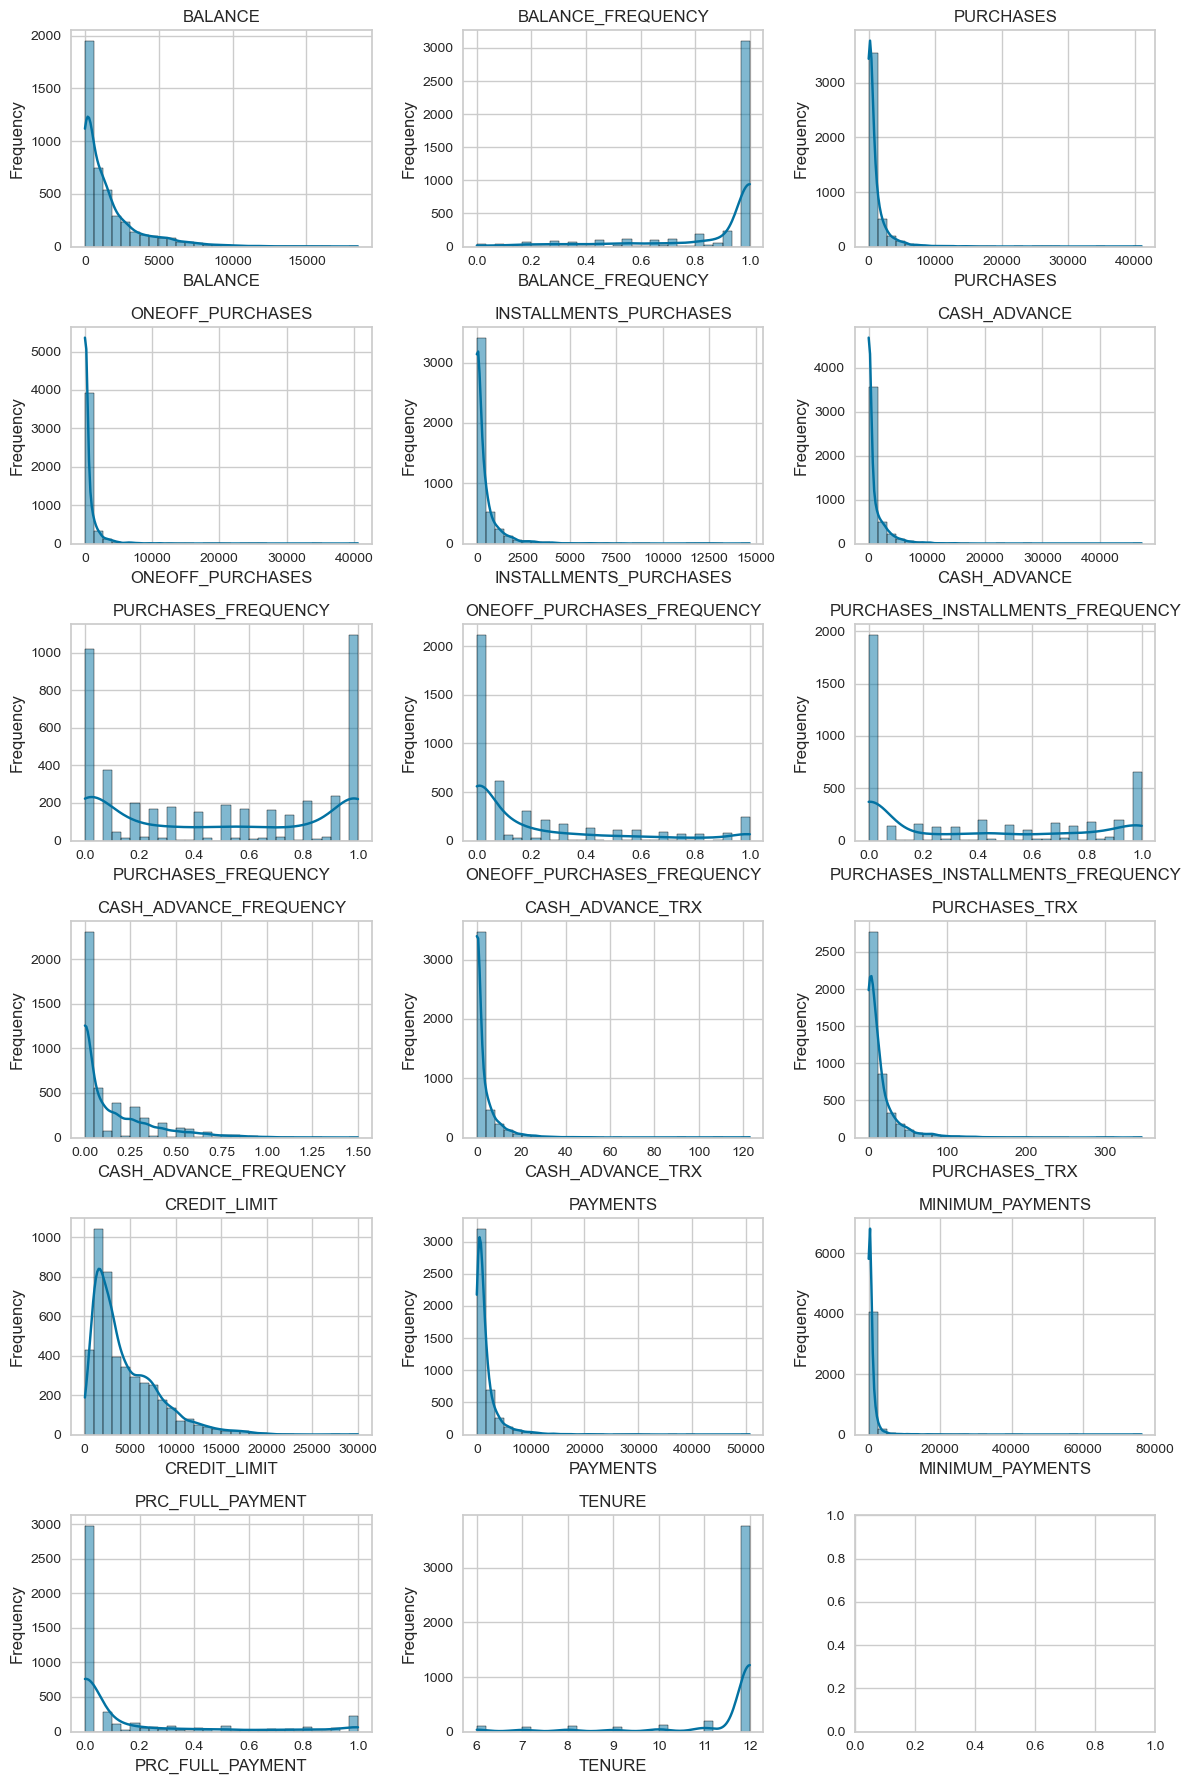

In [11]:
# Exclude 'CUST_ID' column
columns_to_plot = [col for col in df.columns if col != 'CUST_ID']

# Create subplots
fig, axes = plt.subplots(6, 3, figsize=(12, 18))

# Loop through each column and create a subplot
for i, column in enumerate(columns_to_plot):
    row = i // 3
    col = i % 3

    # Create a distribution plot for the current column using seaborn
    sns.histplot(df[column].dropna(), ax=axes[row, col], bins=30, kde=True)
    axes[row, col].set_title(f"{column}")
    axes[row, col].set_xlabel(column)
    axes[row, col].set_ylabel("Frequency")

# Adjust spacing between subplots
fig.tight_layout()

# Show the plots
plt.show()

In [12]:
# check skewness
for i in df[num_cols]:
    print(i, ': ', df[i].skew())

BALANCE :  2.3290088807150915
BALANCE_FREQUENCY :  -2.026529776439142
PURCHASES :  7.071705718331177
ONEOFF_PURCHASES :  9.951056583113456
INSTALLMENTS_PURCHASES :  6.330629906494809
CASH_ADVANCE :  5.638109294257693
PURCHASES_FREQUENCY :  0.05875497991848613
ONEOFF_PURCHASES_FREQUENCY :  1.5483193819148602
PURCHASES_INSTALLMENTS_FREQUENCY :  0.5082957786202944
CASH_ADVANCE_FREQUENCY :  1.8342106501962343
CASH_ADVANCE_TRX :  6.420103784668197
PURCHASES_TRX :  4.747507133980154
CREDIT_LIMIT :  1.498947716941148
PAYMENTS :  5.747503259811283
MINIMUM_PAYMENTS :  14.669771084332645
PRC_FULL_PAYMENT :  1.9752382754788178


In [13]:
correlation = df[num_cols].corr()
correlation.style.background_gradient(cmap='coolwarm')

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT
BALANCE,1.000000,0.320619,0.187328,0.167061,0.124402,0.520446,-0.077008,0.066430,-0.060508,0.466017,0.383785,0.159587,0.524961,0.314899,0.384727,-0.320950
BALANCE_FREQUENCY,0.320619,1.000000,0.135298,0.101296,0.126404,0.110155,0.226440,0.202556,0.172290,0.191027,0.137942,0.187932,0.088156,0.062314,0.128450,-0.065548
PURCHASES,0.187328,0.135298,1.000000,0.910604,0.629758,-0.052427,0.406943,0.505073,0.324841,-0.116927,-0.062805,0.697422,0.361141,0.614773,0.122752,0.180073
ONEOFF_PURCHASES,0.167061,0.101296,0.910604,1.000000,0.252461,-0.044112,0.267201,0.523013,0.125705,-0.084448,-0.048800,0.526970,0.324166,0.569453,0.065777,0.129681
INSTALLMENTS_PURCHASES,0.124402,0.126404,0.629758,0.252461,1.000000,-0.039929,0.450342,0.199310,0.524022,-0.115095,-0.055383,0.642286,0.236124,0.369109,0.163527,0.178064
CASH_ADVANCE,0.520446,0.110155,-0.052427,-0.044112,-0.039929,1.000000,-0.210290,-0.079799,-0.167850,0.661395,0.681496,-0.045941,0.303921,0.418203,0.143400,-0.167600
PURCHASES_FREQUENCY,-0.077008,0.226440,0.406943,0.267201,0.450342,-0.210290,1.000000,0.502653,0.861212,-0.299092,-0.188039,0.562436,0.106659,0.108692,0.016398,0.322448
ONEOFF_PURCHASES_FREQUENCY,0.066430,0.202556,0.505073,0.523013,0.199310,-0.079799,0.502653,1.000000,0.137608,-0.106753,-0.053327,0.530432,0.265947,0.253170,-0.037131,0.176696
PURCHASES_INSTALLMENTS_FREQUENCY,-0.060508,0.172290,0.324841,0.125705,0.524022,-0.167850,0.861212,0.137608,1.000000,-0.248807,-0.153798,0.525132,0.049628,0.091086,0.044943,0.256954
CASH_ADVANCE_FREQUENCY,0.466017,0.191027,-0.116927,-0.084448,-0.115095,0.661395,-0.299092,-0.106753,-0.248807,1.000000,0.787348,-0.105436,0.156315,0.198981,0.101042,-0.253243


Insight:
- `TENURE` termasuk data kategori karena variasinya yang sangat terbatas.
- Sebaran data seluruh kolom numerik tiddak normal.
- Perbedaan antara mean dan median cukup jauh, hal ini menandakan adanya outlier dan data skewed
- Credit limit dan balance tiap individu paling banyak di kisaran 0 - 5000
- Credit limit paling dipengaruhi oleh balance dan payments berdasarkan plot korelasi

# 5. Feature Engineering

In [14]:
# Membuat copy data
data = df.copy()

## Pemisahan data inferens

Sebagian data diambil dari dataset untuk digunakan sebagai data inferens

In [15]:
# get data inference
data_i = data.sample(20, random_state=30)

# remove data inference from dataset
data = data.drop(data_i.index)

# reset data inf and dataset index
data_i.reset_index(drop=True, inplace=True)
data.reset_index(drop=True, inplace=True)

# check result shape
print('Ukuran data asli :',df.shape)
print('Ukuran data inference :', data_i.shape)
print('Ukuran data asli - data inference :', data.shape)

Ukuran data asli : (4475, 18)
Ukuran data inference : (20, 18)
Ukuran data asli - data inference : (4455, 18)


## Seleksi Fitur Numerik
Untuk algoritma Kmeans hanya akan digunakan data numerik karena penggunaan data kategori akan mangganggu clustering

In [16]:
# Drop kolom kategori
X = data[num_cols]

## Handling Missing Value

In [17]:
# cek missing value
X.isna().sum()

BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          0
PAYMENTS                              0
MINIMUM_PAYMENTS                    155
PRC_FULL_PAYMENT                      0
dtype: int64

Terdapat 155 missing value pada kolom MINIMUM_PAYMENTS

In [18]:
# cek baris dengan missing value
X.loc[X.isna().any(axis=1)]

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT
0,3.833185,0.125000,45.00,45.00,0.0,0.000000,0.125,0.125,0.0,0.000000,0,1,500.0,0.000000,NaN,0.0
1,0.000000,0.000000,176.03,176.03,0.0,0.000000,0.125,0.125,0.0,0.000000,0,1,7000.0,0.000000,NaN,0.0
6,0.228572,0.125000,60.00,60.00,0.0,0.000000,0.125,0.125,0.0,0.000000,0,1,1500.0,438.738982,NaN,0.0
21,1464.324632,1.000000,1174.39,1174.39,0.0,0.000000,0.250,0.250,0.0,0.000000,0,8,9000.0,0.000000,NaN,0.0
25,16.887571,0.363636,1083.00,1083.00,0.0,0.000000,0.250,0.250,0.0,0.000000,0,3,1200.0,3905.430817,NaN,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4252,19.949534,0.111111,0.00,0.00,0.0,326.731167,0.000,0.000,0.0,0.111111,5,0,2500.0,0.000000,NaN,0.0
4253,0.000000,0.000000,0.00,0.00,0.0,253.887233,0.000,0.000,0.0,0.111111,1,0,500.0,2437.932505,NaN,0.0
4255,8.187263,0.111111,0.00,0.00,0.0,793.848237,0.000,0.000,0.0,0.111111,1,0,1350.0,0.000000,NaN,0.0
4257,25.998899,0.111111,0.00,0.00,0.0,466.387778,0.000,0.000,0.0,0.111111,1,0,4000.0,0.000000,NaN,0.0


In [19]:
X['MINIMUM_PAYMENTS'].fillna(X['MINIMUM_PAYMENTS'].median(), inplace=True)

In [20]:
# cek missing value
X.isna().sum()

BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
dtype: int64

## Handling Outliers

### Melihat persentase outlier

In [21]:
# IQR
q1 = X[num_cols].quantile(0.25)
q3 = X[num_cols].quantile(0.75)
iqr = q3 - q1

# lower dan upper limit
lower_threshold = q1 - 1.5 * iqr
upper_threshold = q3 + 1.5 * iqr

# menghitung persentase outlier
outlier_percentages = ((X[num_cols] < lower_threshold) | (X[num_cols] > upper_threshold)).mean() * 100

print('outlier percentage:')
print(outlier_percentages)

outlier percentage:
BALANCE                              8.013468
BALANCE_FREQUENCY                   16.722783
PURCHASES                            9.405163
ONEOFF_PURCHASES                    11.694725
INSTALLMENTS_PURCHASES               9.876543
CASH_ADVANCE                        11.268238
PURCHASES_FREQUENCY                  0.000000
ONEOFF_PURCHASES_FREQUENCY          12.480359
PURCHASES_INSTALLMENTS_FREQUENCY     0.000000
CASH_ADVANCE_FREQUENCY               3.860831
CASH_ADVANCE_TRX                     9.023569
PURCHASES_TRX                        8.956229
CREDIT_LIMIT                         2.648709
PAYMENTS                             9.270483
MINIMUM_PAYMENTS                    10.684624
PRC_FULL_PAYMENT                    17.822671
dtype: float64


Terdapat outlier di semua kolom numerik kecuali pada kolom `PURCHASES_FREQUENCY`. Outlier paling banyak terdapat pada kolom `PRC_FULL_PAYMENT` sebesar 17.8% dari total data

In [22]:
# check skewness
for i in X.columns:
    print(i, ': ', X[i].skew())

BALANCE :  2.3318903276170473
BALANCE_FREQUENCY :  -2.0257753068711812
PURCHASES :  7.073342680358979
ONEOFF_PURCHASES :  9.954266489686319
INSTALLMENTS_PURCHASES :  6.326413337160098
CASH_ADVANCE :  5.653192385392661
PURCHASES_FREQUENCY :  0.05816059782450154
ONEOFF_PURCHASES_FREQUENCY :  1.5455301027792048
PURCHASES_INSTALLMENTS_FREQUENCY :  0.508146097423484
CASH_ADVANCE_FREQUENCY :  1.831307335765682
CASH_ADVANCE_TRX :  6.408460989028106
PURCHASES_TRX :  4.746913828412293
CREDIT_LIMIT :  1.494466642635993
PAYMENTS :  5.736264328884076
MINIMUM_PAYMENTS :  14.88686646015737
PRC_FULL_PAYMENT :  1.974410855175058


Berdasarkan skewness semua kolom kecuali `PURCHASES_FREQUENCY` tidak terdistribusi normal karena nilai skewnessnya >0.5 atau <-0.5

### Visualisasi outlier dengan histogram dan boxplot

In [23]:
# make function to see histogram distribusion data dan box plot outliers
def diagnostic_plots(df, variable):
    # Define figure size
    plt.figure(figsize=(16, 4))

    # Histogram
    plt.subplot(1, 2, 1)
    sns.histplot(df[variable], bins=30, kde=True)
    plt.title('Histogram')

    # Boxplot
    plt.subplot(1, 2, 2)
    sns.boxplot(y=df[variable])
    plt.title('Boxplot')

    plt.show()
    
    print('skewness:', df[variable].skew())
    if (df[variable].skew() >= -0.5 ) | (df[variable].skew() <= 0.5 ) :
      print('the distribution is skewed')
    else:
      print('the distribution is normal')

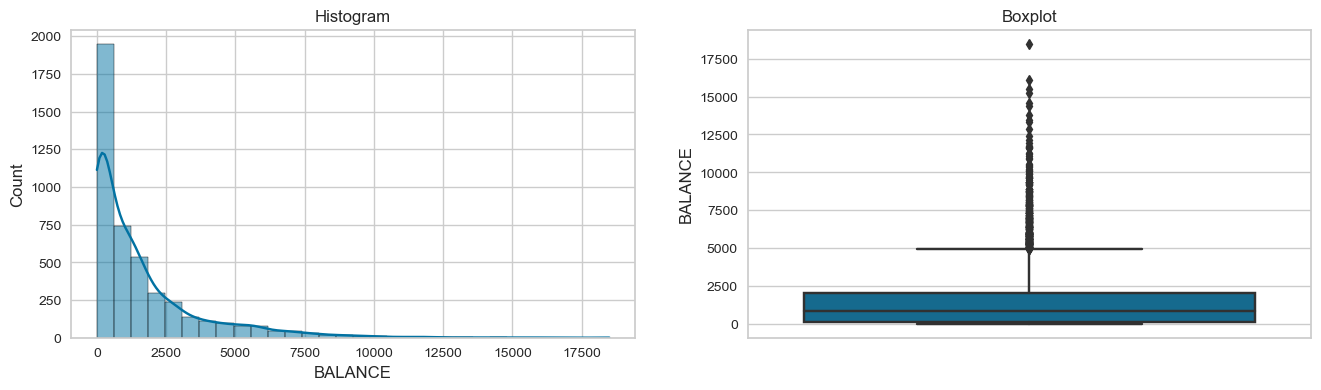

skewness: 2.3318903276170473
the distribution is skewed


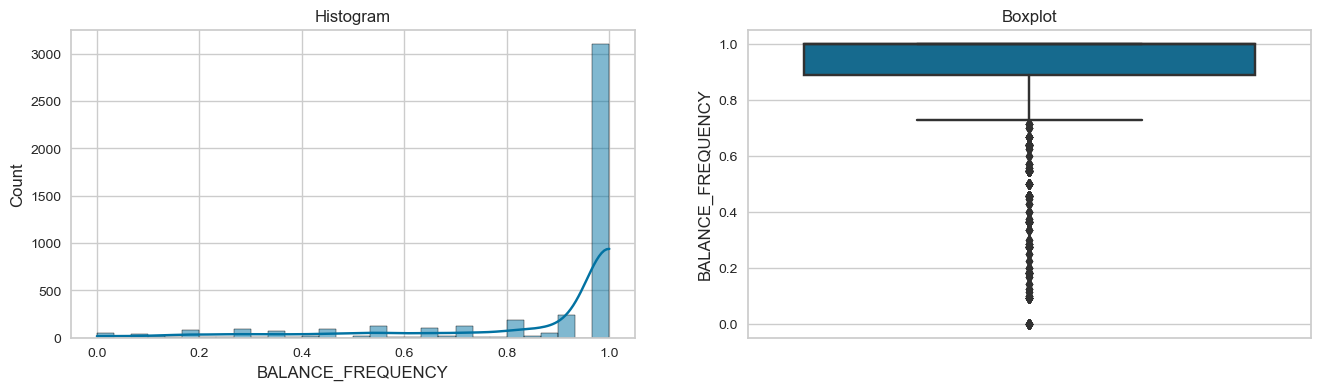

skewness: -2.0257753068711812
the distribution is skewed


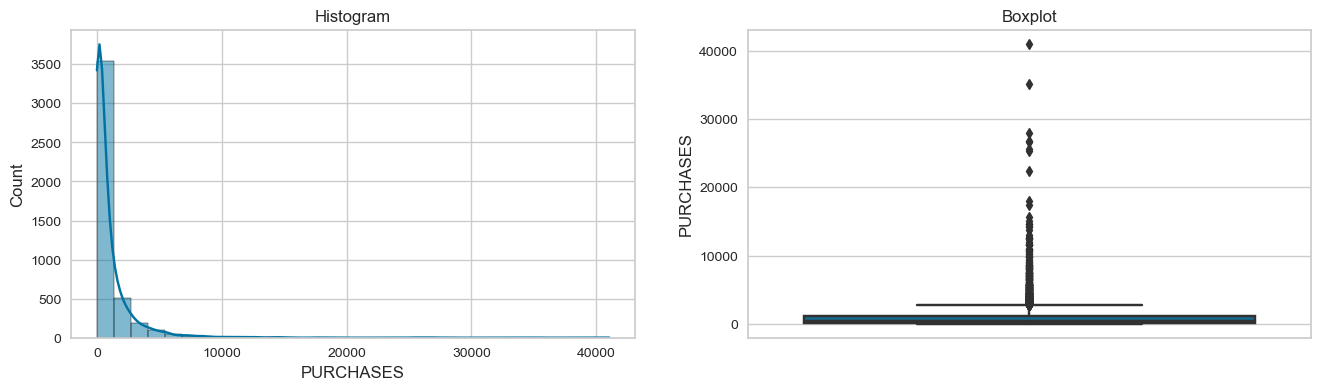

skewness: 7.073342680358979
the distribution is skewed


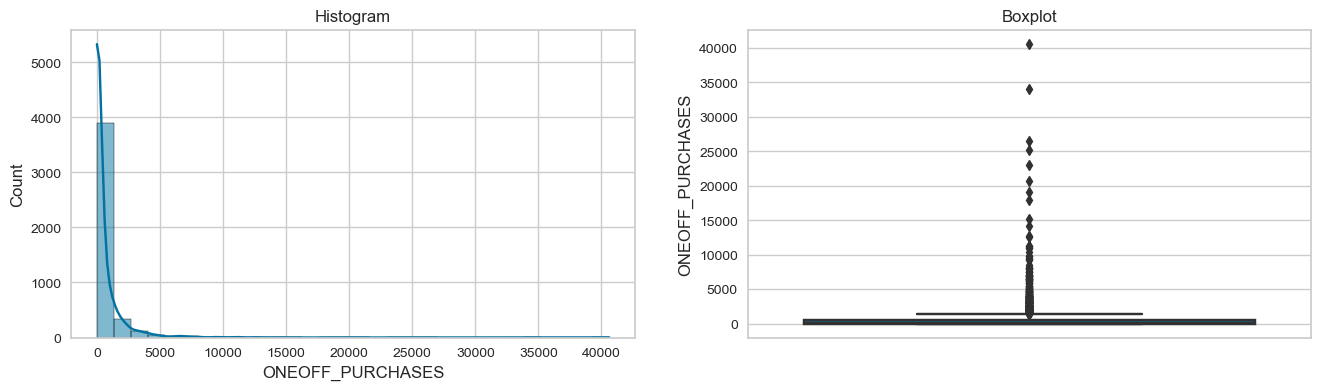

skewness: 9.954266489686319
the distribution is skewed


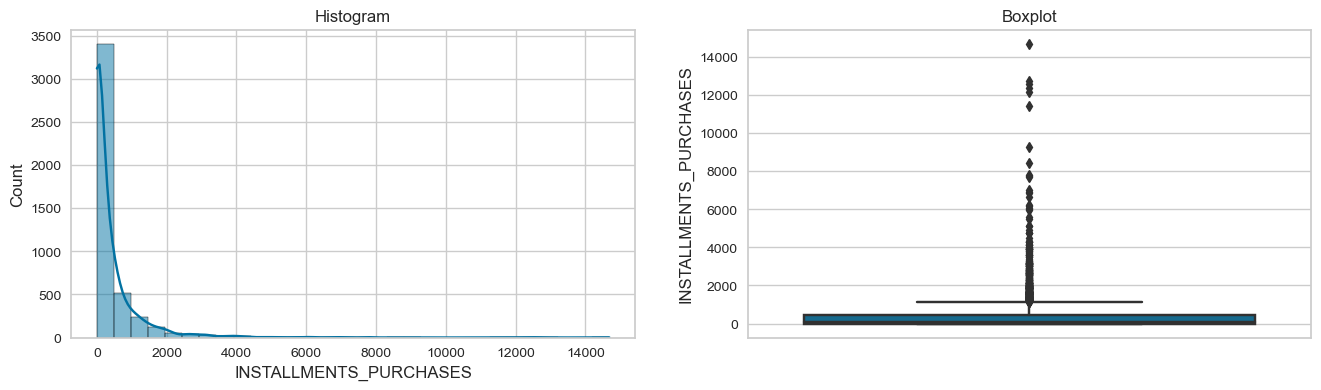

skewness: 6.326413337160098
the distribution is skewed


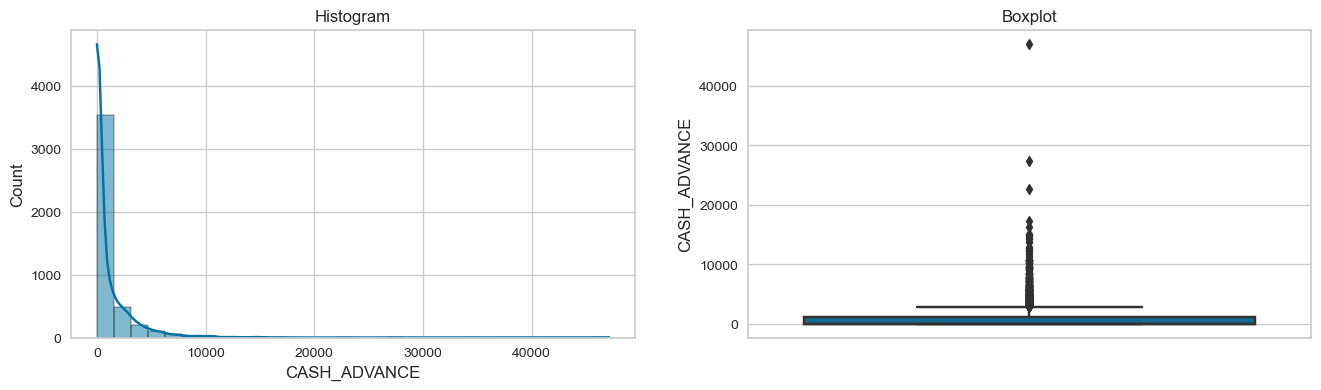

skewness: 5.653192385392661
the distribution is skewed


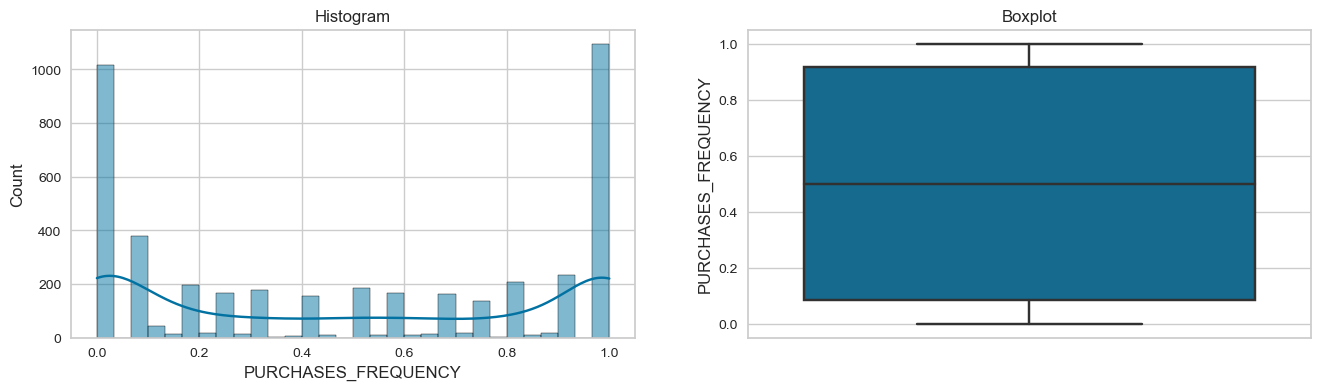

skewness: 0.05816059782450154
the distribution is skewed


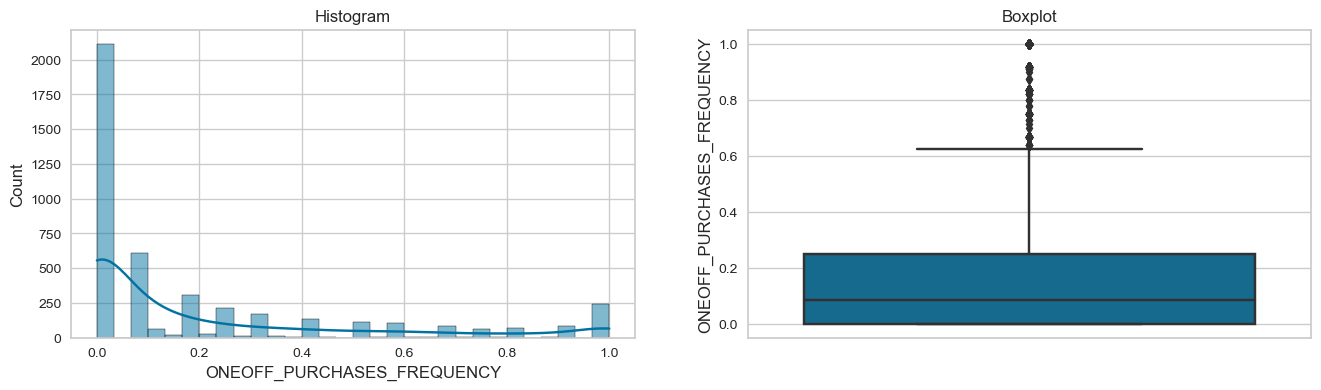

skewness: 1.5455301027792048
the distribution is skewed


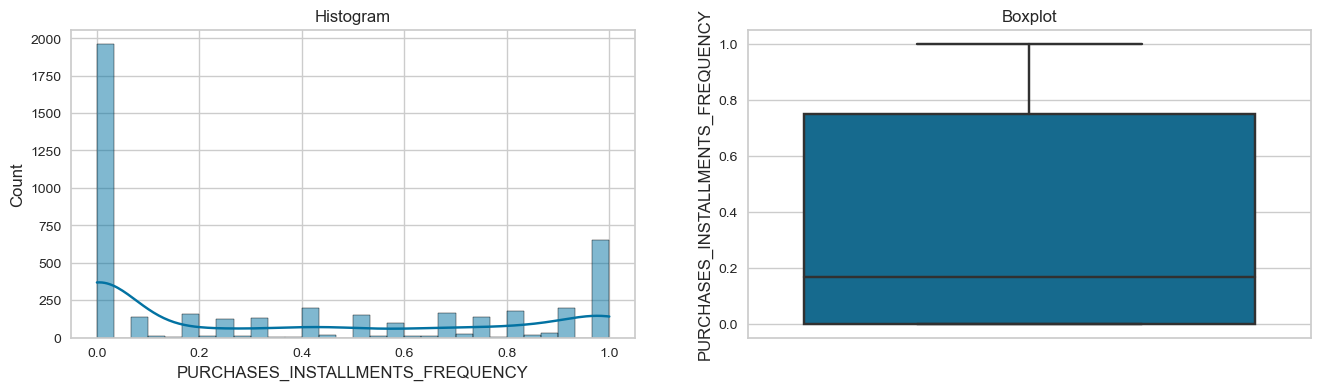

skewness: 0.508146097423484
the distribution is skewed


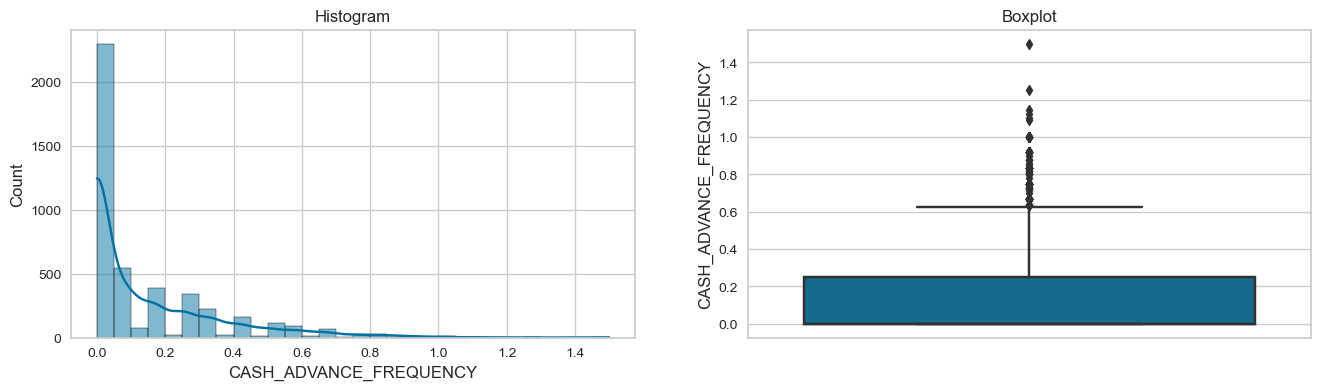

skewness: 1.831307335765682
the distribution is skewed


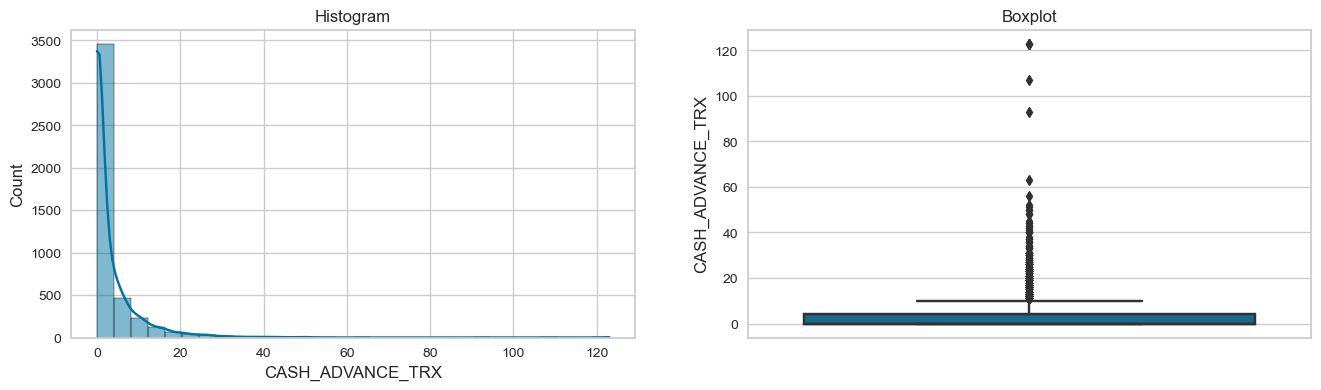

skewness: 6.408460989028106
the distribution is skewed


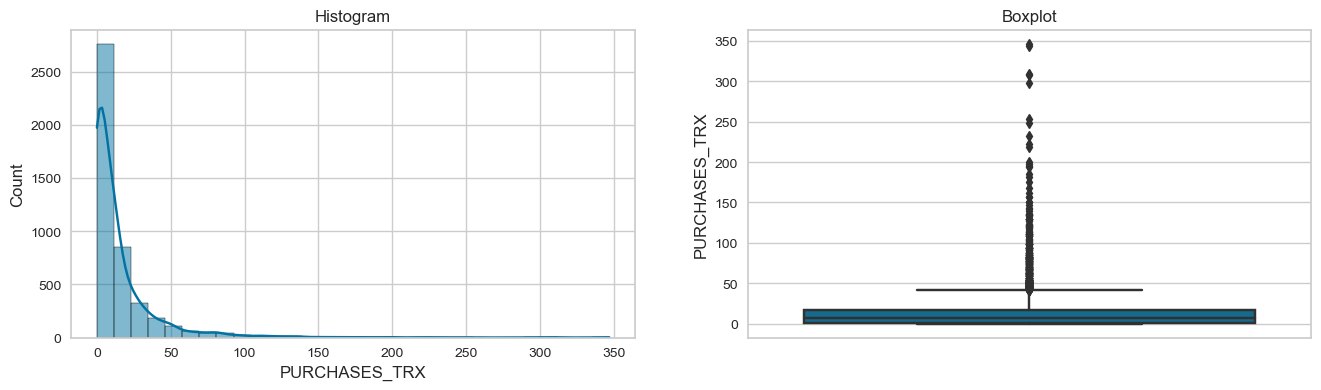

skewness: 4.746913828412293
the distribution is skewed


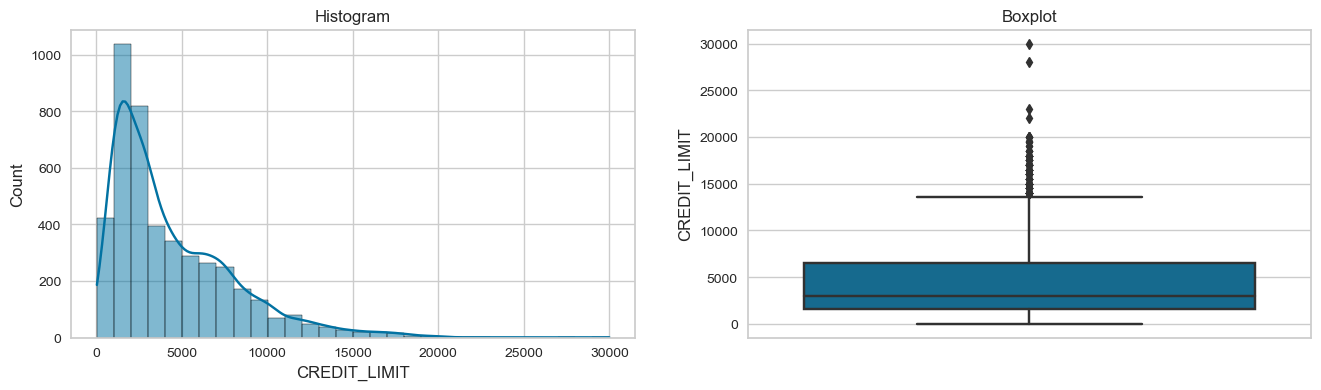

skewness: 1.494466642635993
the distribution is skewed


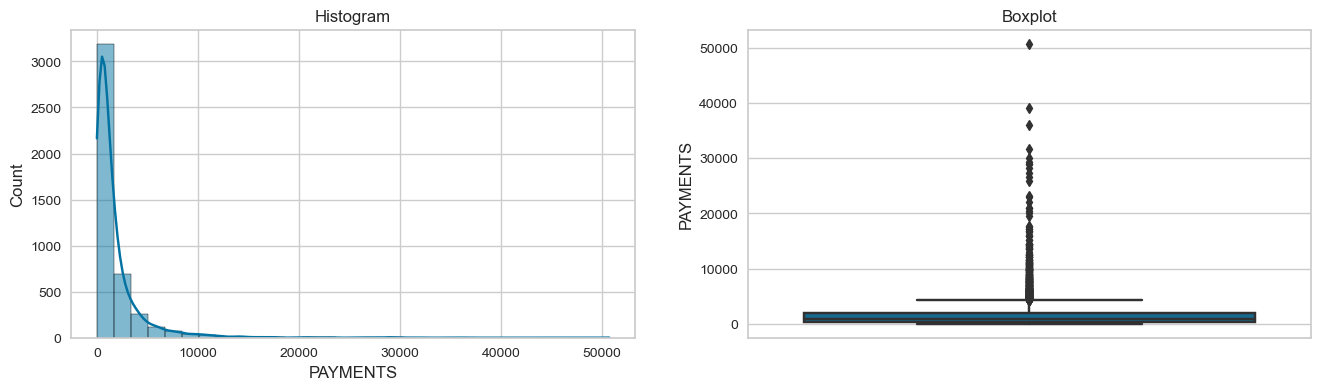

skewness: 5.736264328884076
the distribution is skewed


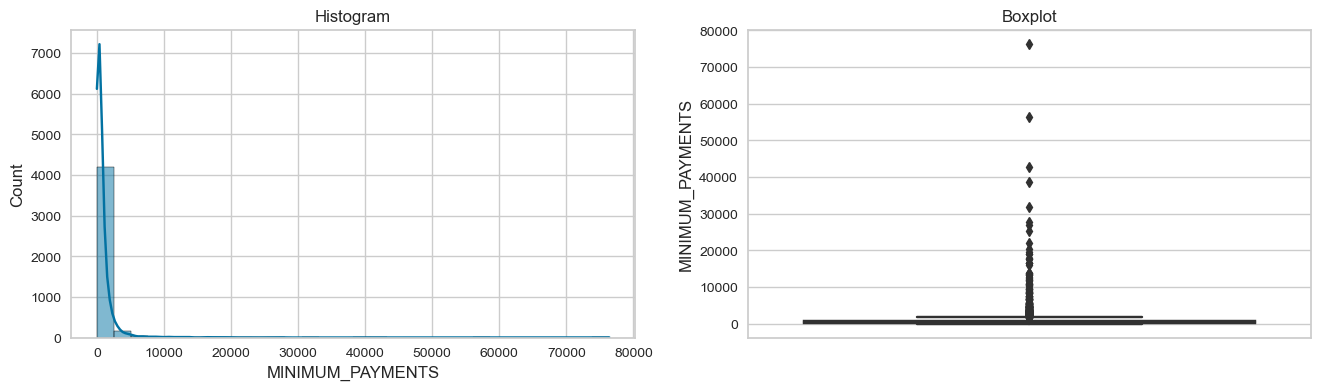

skewness: 14.88686646015737
the distribution is skewed


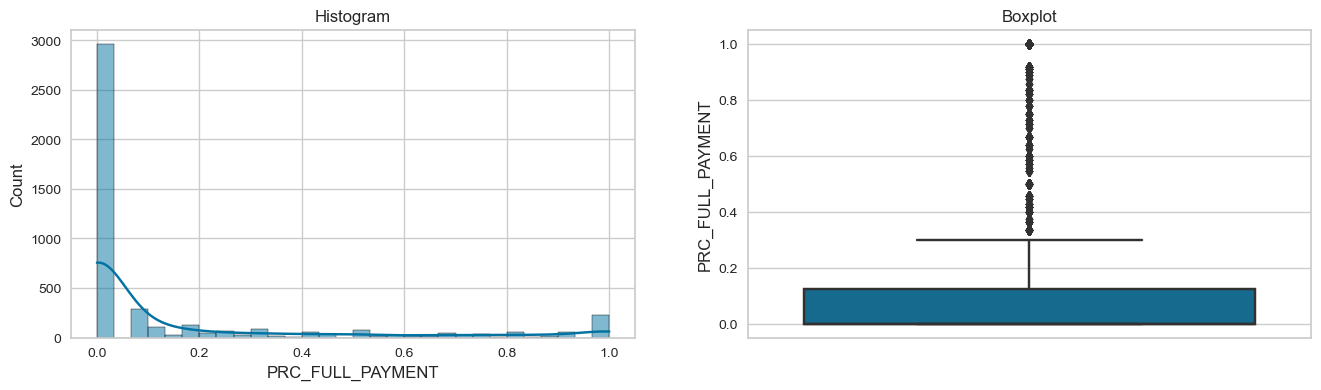

skewness: 1.974410855175058
the distribution is skewed


In [24]:
for col in num_cols:
    diagnostic_plots(X, col)

Karena data dengan outlier terdistribusi tidak normal, maka akan dilakukan capping dengan IQR lalu outlier akan di winsorizing.

### winsorizer

In [25]:
# Membuat capper pada data train
winsoriser = Winsorizer(capping_method='iqr', # Gaussian kalau distribusi normal
                         tail='both',
                         fold=1.5,
                         variables=num_cols)

X_Out = winsoriser.fit_transform(X)

## Feature Scaling

Dikarenakan distribusi nya tidak normal, maka `feature scaling` menggunakan `MinMaxScaler`

In [26]:
# Define the Scaler
scaler = MinMaxScaler() #Defining which scaler to use
X_scaled = scaler.fit_transform(X_Out) # applying the scaler

In [27]:
# Change the Scaled data into a dataframe
X_scaled = pd.DataFrame(X_scaled, columns = num_cols)
X_scaled

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT
0,0.000777,0.00,0.016643,0.031292,0.0,0.000000,0.125000,0.200000,0.0,0.000000,0.0,0.024390,0.032609,0.000000,0.184629,0.0
1,0.000000,0.00,0.065103,0.122409,0.0,0.000000,0.125000,0.200000,0.0,0.000000,0.0,0.024390,0.503623,0.000000,0.184629,0.0
2,0.153664,0.55,0.058212,0.109454,0.0,0.000000,0.125000,0.200000,0.0,0.000000,0.0,0.146341,0.083333,0.354158,1.000000,0.0
3,0.053636,0.00,0.425313,0.799694,0.0,0.000000,0.125000,0.200000,0.0,0.000000,0.0,0.024390,0.083333,0.717895,0.049931,0.0
4,0.089326,1.00,0.221903,0.417232,0.0,0.000000,0.125000,0.200000,0.0,0.000000,0.0,0.024390,0.068841,0.051025,0.080574,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4450,1.000000,1.00,0.000000,0.000000,0.0,1.000000,0.000000,0.000000,0.0,0.872728,0.9,0.000000,0.865942,0.585095,1.000000,0.0
4451,0.210847,1.00,0.000000,0.000000,0.0,0.488423,0.000000,0.000000,0.0,0.872728,1.0,0.000000,0.097826,0.068754,0.168351,0.0
4452,0.268177,1.00,0.000000,0.000000,0.0,0.267735,0.000000,0.000000,0.0,0.872728,1.0,0.000000,0.105072,0.245421,0.182873,0.0
4453,0.214975,1.00,0.000000,0.000000,0.0,0.518351,0.000000,0.000000,0.0,0.872728,1.0,0.000000,0.141304,0.096535,0.161973,0.0


## Reduksi Dimensi - PCA

### VIF

Nilai VIF diperiksa sebagai acuan reduksi dimensi

In [28]:
# Membuat function untuk menghitung nilai VIF
def calc_vif(X):

    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = X_scaled.columns
    vif["VIF"] = [variance_inflation_factor(X_scaled.values, i) for i in range(X_scaled.shape[1])]
    vif = vif.sort_values(by=['VIF'],ascending=False)
    return(vif)

In [29]:
# Menampilkan nilai VIF
calc_vif(X_scaled)

,variables,VIF
2,PURCHASES,27.866272
6,PURCHASES_FREQUENCY,25.151948
8,PURCHASES_INSTALLMENTS_FREQUENCY,22.006268
3,ONEOFF_PURCHASES,16.153957
10,CASH_ADVANCE_TRX,12.904728
9,CASH_ADVANCE_FREQUENCY,11.603730
11,PURCHASES_TRX,11.501270
4,INSTALLMENTS_PURCHASES,11.485086
7,ONEOFF_PURCHASES_FREQUENCY,10.162397
0,BALANCE,10.055190


Berrdasarkan VIF terdapat 4 fitur dengan nilai < 5 yang berarti memiliki kaitan kecil dengan fitur lainnya. Jika dilakukan reduksi dimensi dapat dilakukan reduksi hingga 12 dimensi

### Periksa PCA dengan informasi 95%

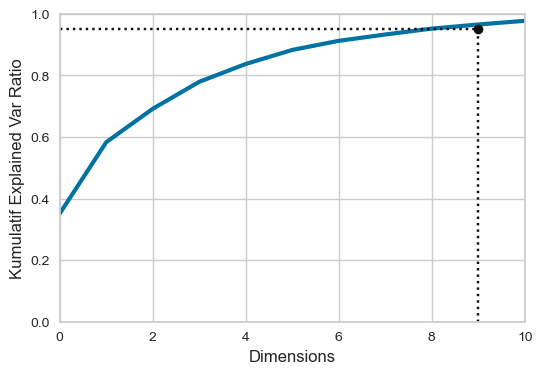

In [30]:
# define PCA
pca = PCA()
pca.fit(X_scaled)

# PCA dengan informasi 0.99

cumsum = np.cumsum(pca.explained_variance_ratio_) # cumsum = kulumasi baris atau kolom berikutnya bergantung axis = 0 atau 1
d = np.argmax(cumsum >= 0.95) + 1                 # argmax = returns the indices of the maximum values along an axis.   

plt.figure(figsize=(6,4))
plt.plot(cumsum, linewidth=3)
plt.axis([0, 10, 0, 1])
plt.xlabel("Dimensions")
plt.ylabel("Kumulatif Explained Var Ratio")
plt.plot([d, d], [0, 0.95], "k:")           # plt. plot([X1,X2], [y1,y2]), ':k' = balck
plt.plot([0, d], [0.95, 0.95], "k:")        # plt. plot([X1,X2], [y1,y2]), ':k' = balck
plt.plot(d, 0.95, "ko")                     # plot elbow, ko = circle b
plt.grid(True)
plt.show()

Untuk informasi sebesar 95% dapat dilakukan reduksi hingga 9 dimensi.

In [31]:
# melihat jumlah informasi yang dibawa dengan reduksi n_components = 12 sesuai dengan nilai VIF

pcaVIF = PCA(n_components=12)
data_reduced_VIF = pcaVIF.fit_transform(X_scaled)
np.sum(pcaVIF.explained_variance_ratio_)

0.9846483074645263

Berdasarkan analisis reduksi dimensi dengan VIF, fitur dapat direduksi menjadi 12 dimensi. Setelah dilakukan pemeriksaan dengan PCA dapat dilihat dengan mereduksi menjadi 12 dimensi, representasi informasi dari data sebesar 98%.

## Membuat pipeline

In [32]:
pipe = Pipeline([
    ('wins', Winsorizer(capping_method='iqr', fold=1.5, tail='both')),
    ('scaler', MinMaxScaler()),
    ('pca', PCA(n_components=12))
])

In [33]:
X_transformed = pipe.fit_transform(X)

pipeline dibuat untuk mempermudah proses inferencing

# 6. Model Definition

Model yang akan digunakan adalah KMeans. KMeans bekerja dengan menetapkan nilai K yang melambangkan jumlah cluster dan membuat centroid sebanyak K. Centroid yang akan menentukan penempatan cluster.

In [34]:
kmeans = KMeans()

# 7. Model Training

## Menentukan nilai K

Elbow Method


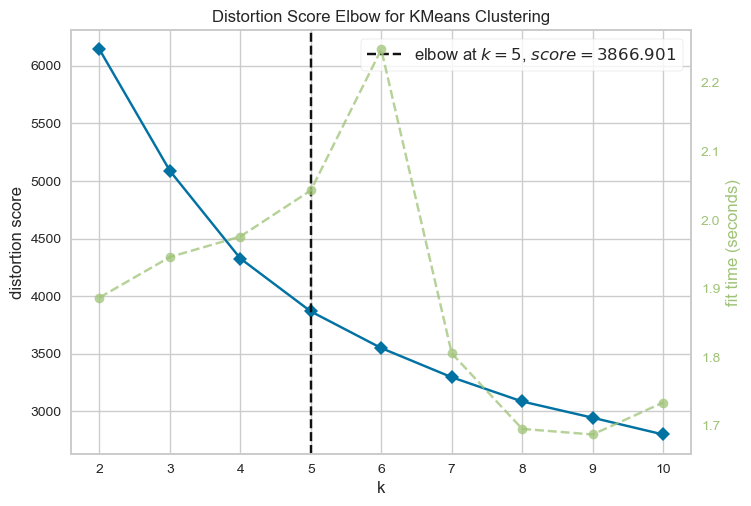

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [35]:
# elbow method

print('Elbow Method')
Elbow_M = KElbowVisualizer(KMeans(), k=10)
Elbow_M.fit(X_transformed)
Elbow_M.show()

Beerdasarkan elbow method, nilai K yang paling optimal adalah 5. selanjutnya akan diperiksa dengan sillhouette method.

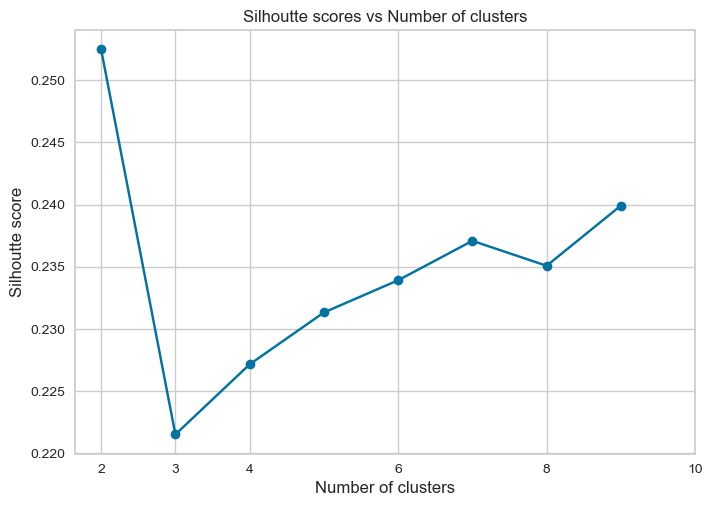

In [36]:
kmeans_models = [KMeans(n_clusters=k, random_state=23).fit(X_transformed) for k in range (1, 10)]
silhoutte_scores = [silhouette_score(X_transformed, model.labels_) for model in kmeans_models[1:9]]
plt.plot(range(2,10), silhoutte_scores, "bo-")
plt.xticks([2, 3, 4, 6, 8, 10])
plt.title('Silhoutte scores vs Number of clusters')
plt.xlabel('Number of clusters')
plt.ylabel('Silhoutte score')
plt.show()

Nilai silhouette yang tertinggi ada di K = 2

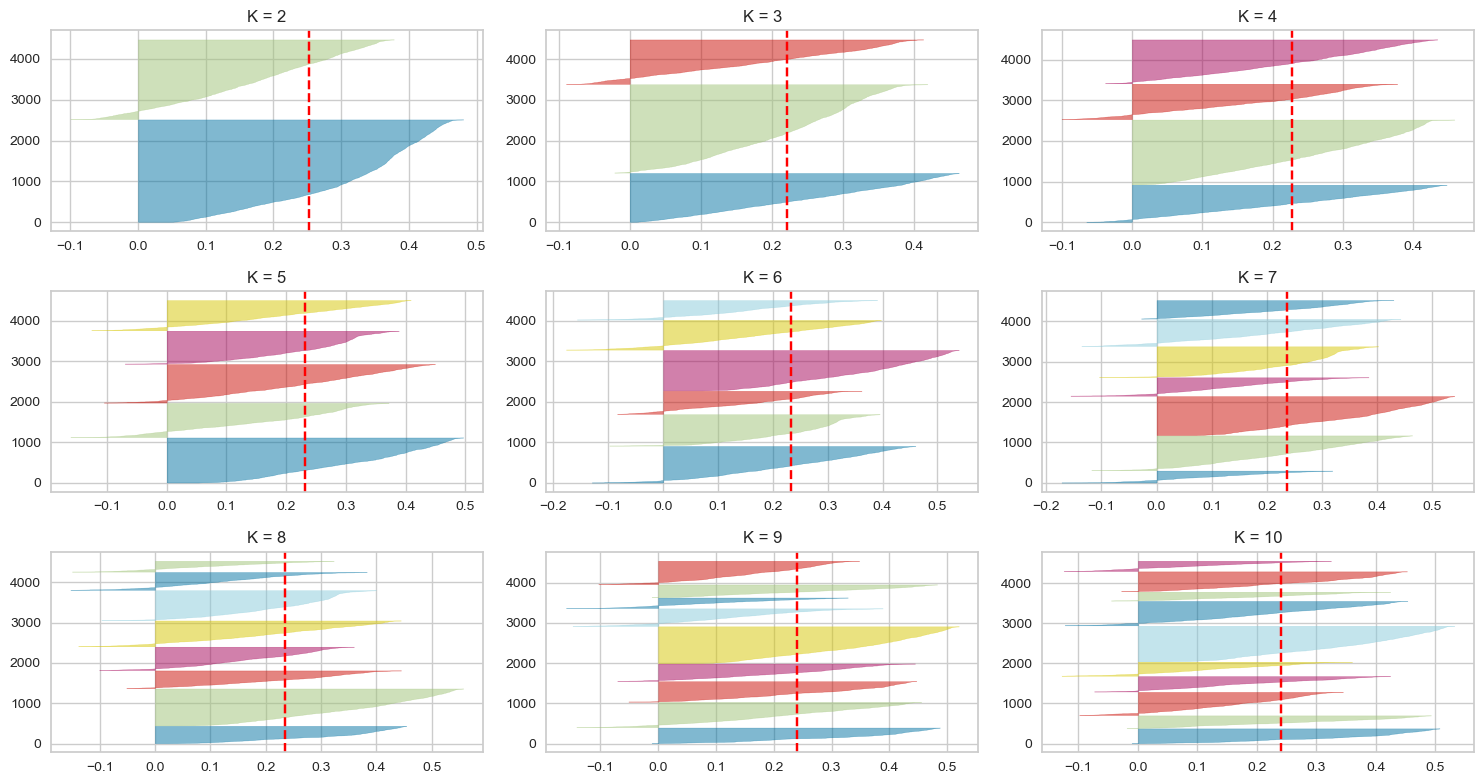

In [37]:
# Set up subplots
fig, axes = plt.subplots(3, 3, figsize=(15, 8))

# Loop melalui setiap subplot
for i, ax in enumerate(axes.flatten()):
    
    # Set jumlah cluster
    n_clusters = i + 2
    
    # Initialize K-means clustering
    kmeans = KMeans(n_clusters=n_clusters, init="k-means++", n_init = 10, max_iter = 100, random_state = 42)

    # Buat SilhouetteVisualizer
    visualizer = SilhouetteVisualizer(kmeans, colors='yellowbrick', ax=ax)
    
    # Fit visualizer ke data x
    visualizer.fit(X_transformed)
    
    # Set title
    ax.set_title(f'K = {n_clusters}')
    
# Adjust layout
plt.tight_layout()
plt.show()

Berdasarkan metode silhouette ukuran paling konsisten dari tiap cluster dan seluruh cluster melewati garis merah terdapat pada K= 4 dan K= 5.

# 8. Model Evaluation

## Kmeans clustering

In [38]:
# Definisi model kmeans dengan n_clusters =4

kmeans4 = KMeans(n_clusters=4, random_state=0)
kmeans4.fit(X_transformed)

KMeans(n_clusters=4, random_state=0)

In [39]:
# membuat list cluster
cluster4 = kmeans4.predict(X_transformed)

In [40]:
# membuat kolom cluster4
data['cluster4'] = cluster4

In [41]:
data.groupby(by = 'cluster4').mean()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
cluster4,,,,,,,,,,,,,,,,,,
0,4538.481001,536.706750,0.899817,722.516923,95.305700,628.045329,146.388047,0.864653,0.079557,0.793450,0.031857,0.559778,16.164041,3342.659917,888.486143,741.120729,0.291527,11.409639
1,4545.052731,742.389518,0.756918,278.592009,226.028406,52.619473,356.773188,0.185740,0.106243,0.077209,0.077222,1.236033,3.016321,3258.179916,924.933438,444.446836,0.082065,11.463905
2,4389.374282,2125.686291,0.979306,3468.952044,2348.207865,1120.744179,686.130551,0.900325,0.655825,0.618740,0.090256,2.384615,46.911596,6524.971297,3531.238945,1050.010201,0.233423,11.849598
3,4366.510965,3675.162472,0.961373,250.746524,164.034923,86.749671,3355.783313,0.190396,0.083870,0.113599,0.407405,11.072368,3.828947,6063.729399,2474.504312,1573.374467,0.023131,11.440789


Berikut adalah penjelasan untuk masing-masing cluster:

Cluster 0: **Moderate Spenders (Pengeluar Sedang)**

Karakteristik:
- Pelanggan dalam cluster ini memiliki saldo rata-rata yang relatif rendah.
- Melakukan pembelian yang sedang, baik satu kali maupun dalam angsuran.
- Penarikan tunai relatif rendah dibandingkan dengan pembelian.
- Frekuensi pembelian sedang, dengan frekuensi pembelian satu kali yang rendah.
- Pelanggan ini memiliki batas kredit yang sedang.
- Melakukan pembayaran secara teratur.
- Memiliki masa berlangganan yang sedang.

Cluster 1: **High Spenders (Pengeluar Tinggi)**

Karakteristik:
- Pelanggan dalam cluster ini memiliki saldo rata-rata yang tinggi.
- Melakukan pembelian dalam jumlah besar, baik satu kali maupun dalam angsuran.
- Penarikan tunai relatif rendah dibandingkan dengan pembelian.
- Frekuensi pembelian tinggi, dengan frekuensi pembelian satu kali yang juga tinggi.
- Pelanggan ini memiliki batas kredit yang tinggi.
- Melakukan pembayaran secara teratur.
- Memiliki masa berlangganan yang sedang hingga panjang.

Cluster 2: **Low Spenders (Pengeluar Rendah)**

Karakteristik:
- Pelanggan dalam cluster ini memiliki saldo rata-rata yang rendah.
- Melakukan pembelian dalam jumlah kecil, terutama dalam angsuran.
- Penarikan tunai relatif rendah dibandingkan dengan pembelian.
- Frekuensi pembelian rendah, dengan frekuensi pembelian satu kali yang rendah.
- Pelanggan ini memiliki batas kredit yang rendah.
- Pembayaran yang dilakukan cenderung rendah.
- Memiliki masa berlangganan yang sedang hingga panjang.

Cluster 3: **Cash Advance Users (Pengguna Penarikan Tunai)**

Karakteristik:
- Pelanggan dalam cluster ini memiliki saldo rata-rata yang rendah hingga sedang.
- Melakukan pembelian dalam jumlah kecil hingga sedang, baik satu kali maupun dalam angsuran.
- Penarikan tunai relatif tinggi dibandingkan dengan pembelian.
- Frekuensi pembelian sedang, dengan frekuensi pembelian satu kali yang rendah.
- Pelanggan ini memiliki batas kredit yang rendah hingga sedang.
- Pembayaran yang dilakukan cenderung rendah.
- Memiliki masa berlangganan yang sedang hingga panjang.

In [42]:
# drop cluster4
data.drop(['cluster4'],axis=1, inplace=True)

In [43]:
# Definisi model kmeans dengan n_clusters =5

kmeans5 = KMeans(n_clusters=5, random_state=0)
kmeans5.fit(X_transformed)

KMeans(n_clusters=5, random_state=0)

In [44]:
# membuat list cluster
cluster5 = kmeans5.predict(X_transformed)

In [45]:
# membuat kolom cluster5
data['cluster5'] = cluster5

In [46]:
data.groupby(by = 'cluster5').mean().sort_values(by='BALANCE')

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
cluster5,,,,,,,,,,,,,,,,,,
4,4345.733990,188.079155,0.472638,347.521429,241.643424,105.905099,401.090759,0.251879,0.094500,0.148915,0.053474,0.964286,3.959360,3750.489252,1201.975673,163.851306,0.204416,11.211823
3,4622.116965,567.818892,0.930970,781.180980,96.790263,685.339083,173.979878,0.907421,0.081553,0.842151,0.035893,0.658588,17.631191,3306.828293,917.009636,806.563100,0.280141,11.404636
1,4600.282883,1403.549339,0.991157,243.736396,193.279063,50.517694,432.183118,0.181938,0.106776,0.076323,0.109954,1.824324,3.117117,3145.540541,792.581970,752.102316,0.013178,11.665766
0,4395.442857,2120.171077,0.979300,3535.033190,2402.985548,1132.047643,687.831608,0.906721,0.666887,0.622179,0.090710,2.401190,47.457143,6627.202381,3606.538020,1049.554685,0.245659,11.848810
2,4340.163978,3944.207185,0.962839,282.294973,183.697527,98.644113,3811.951708,0.211565,0.094038,0.126590,0.446001,12.497312,4.471774,6409.145894,2700.333677,1640.964598,0.022680,11.423387



Dari 

Cluster 0 **Moderate Spenders (Pengeluar Sedang)**

Karakteristik:
- Pelanggan dalam cluster ini memiliki saldo rata-rata yang relatif rendah.
- Mereka melakukan pembelian yang sedang, baik satu kali maupun dalam angsuran.
- Penarikan tunai relatif rendah dibandingkan dengan pembelian.
- Frekuensi pembelian sedang, dengan frekuensi pembelian satu kali yang rendah.
- Pelanggan ini memiliki batas kredit yang sedang dan melakukan pembayaran secara teratur.
- Mereka memiliki masa berlangganan yang sedang.

Cluster 1 **High Balance, Low Purchases (Saldo Tinggi, Pembelian Rendah)**

Karakteristik:
- Pelanggan dalam cluster ini memiliki saldo rata-rata yang lebih tinggi dibandingkan dengan cluster lainnya.
- Mereka melakukan pembelian yang relatif rendah, baik satu kali maupun dalam angsuran.
- Penarikan tunai rendah dibandingkan dengan pembelian.
- Frekuensi pembelian rendah, dengan frekuensi pembelian satu kali yang rendah.
- Pelanggan ini memiliki batas kredit yang sedang dan melakukan pembayaran secara teratur.
- Mereka memiliki masa berlangganan yang sedang.

Cluster 2 **Cash Advance Users (Pengguna Penarikan Tunai)**

Karakteristik:
- Pelanggan dalam cluster ini memiliki saldo rata-rata yang relatif rendah.
- Mereka melakukan pembelian yang rendah, baik satu kali maupun dalam angsuran.
- Penarikan tunai tinggi dibandingkan dengan pembelian.
- Frekuensi pembelian rendah, dengan frekuensi pembelian satu kali yang rendah.
- Pelanggan ini memiliki batas kredit yang tinggi dan melakukan pembayaran secara jarang.
- Mereka memiliki masa berlangganan yang relatif rendah.

Cluster 3  **Active and High Spenders (Pengeluar Aktif dan Tinggi)**

Karakteristik:
- Pelanggan dalam cluster ini memiliki saldo rata-rata yang lebih tinggi dibandingkan dengan cluster lainnya.
- Mereka melakukan pembelian yang tinggi, baik satu kali maupun dalam angsuran.
- Penarikan tunai relatif rendah dibandingkan dengan pembelian.
- Frekuensi pembelian tinggi, dengan frekuensi pembelian satu kali yang rendah.
- Pelanggan ini memiliki batas kredit yang sedang dan melakukan pembayaran secara teratur.
- Mereka memiliki masa berlangganan yang relatif tinggi.

Cluster 4 **Low Balance, Low Activity (Saldo Rendah, Aktivitas Rendah)**

Karakteristik:
- Pelanggan dalam cluster ini memiliki saldo rata-rata yang relatif rendah.
- Mereka melakukan pembelian yang rendah, baik satu kali maupun dalam angsuran.
- Penarikan tunai rendah dibandingkan dengan pembelian.
- Frekuensi pembelian rendah, dengan frekuensi pembelian satu kali yang rendah.
- Pelanggan ini memiliki batas kredit yang tinggi dan melakukan pembayaran secara jarang.
- Mereka memiliki masa berlangganan yang relatif rendah.

In [47]:
# drop cluster5
data.drop(['cluster5'],axis=1, inplace=True)

## Visualisasi cluster

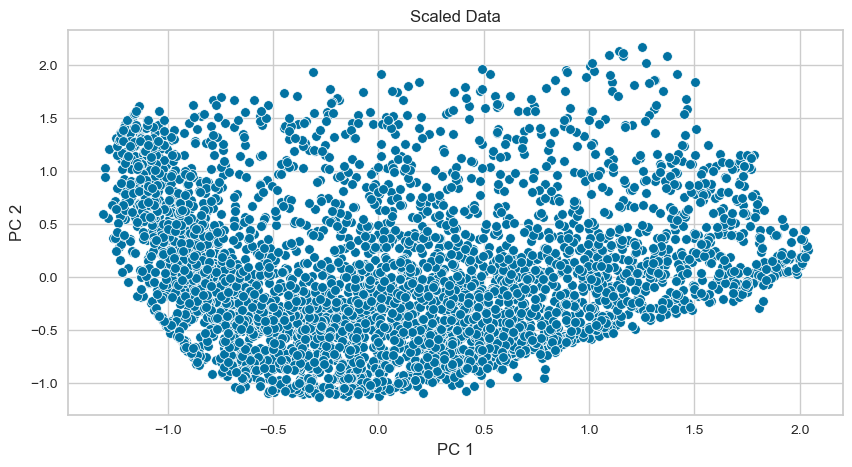

In [48]:
# plot tanpa clustering

pca_2d_scaled=PCA(n_components=2, random_state=0).fit(X_transformed)
twod_scaled=pca_2d_scaled.transform(X_transformed)

fig, ax = plt.subplots(figsize=(10, 5))

sns.scatterplot(x=twod_scaled[:, 0], y=twod_scaled[:, 1], ax=ax)
plt.xlabel('PC 1')
plt.ylabel('PC 2')
plt.title('Scaled Data')
plt.show()

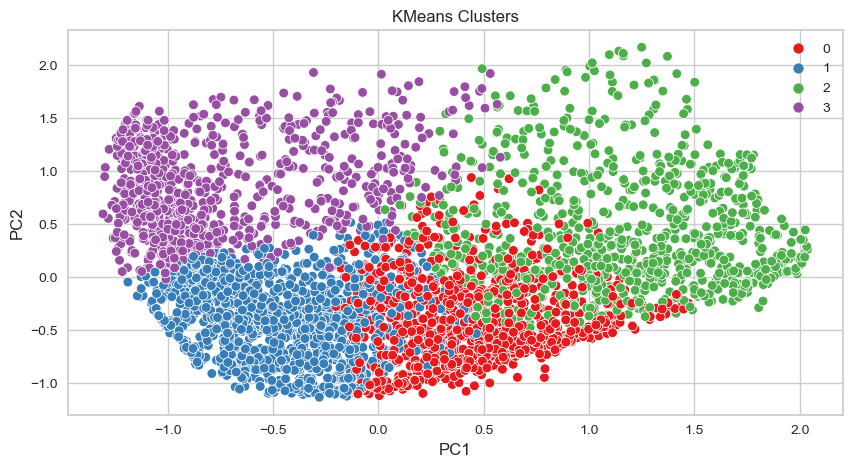

In [49]:
# visualisasi 4 cluster di data Kmean 2d

plt.figure(figsize=(10, 5))
sns.scatterplot(x=twod_scaled[:, 0], y=twod_scaled[:, 1], hue=kmeans4.labels_, palette='Set1')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('KMeans Clusters')
plt.show()

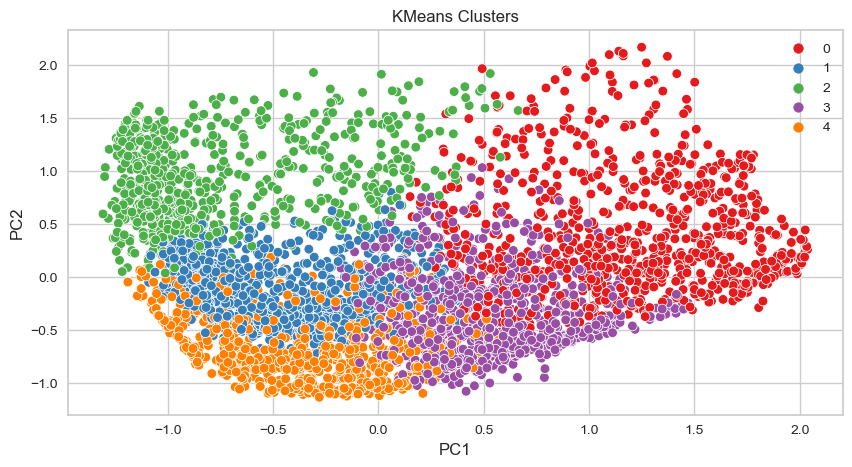

In [50]:
# visualisasi 5 clusterdi data Kmean 2d

plt.figure(figsize=(10, 5))
sns.scatterplot(x=twod_scaled[:, 0], y=twod_scaled[:, 1], hue=kmeans5.labels_, palette='Set1')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('KMeans Clusters')
plt.show()

Berdasarkan visualisasi, kedua nilai K menghasilkan cluster yang terpisah dengan jelas. Untuk itu akan dipilih K=5 karena pada perhitungan sillhouette menghasilkan score yang lebih tinggi.

# 9. Model saving

Model saving tidak dilakukan karena melakukan inference dalam 1 notebook

# 10. Model Inference

Berikut data yang akan dilakukan inference

In [51]:
data_i

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,4299,1082.436807,1.000000,0.00,0.00,0.00,1835.406271,0.000000,0.000000,0.000000,0.250000,7,0,1500.0,2094.304543,258.977488,0.000000,12
1,3963,3121.267822,0.888889,4139.56,4139.56,0.00,3607.406242,0.333333,0.333333,0.000000,0.222222,3,8,9000.0,1600.272221,597.159149,0.000000,9
2,6557,4855.340797,1.000000,0.00,0.00,0.00,1886.470361,0.000000,0.000000,0.000000,0.083333,2,0,6000.0,2996.735376,1855.766226,0.000000,12
3,8897,7533.854422,1.000000,5253.06,3096.10,2156.96,0.000000,0.916667,0.833333,0.750000,0.000000,0,78,20500.0,1790.394949,1727.487481,0.000000,12
4,2187,5422.456378,1.000000,0.00,0.00,0.00,9972.234861,0.000000,0.000000,0.000000,0.166667,2,0,14000.0,1661.693077,1949.814235,0.000000,12
5,1497,882.715792,1.000000,120.00,0.00,120.00,322.935862,1.000000,0.000000,1.000000,0.250000,4,12,1000.0,307.584827,249.005928,0.000000,12
6,2445,47.872617,0.818182,649.00,147.42,501.58,0.000000,0.750000,0.166667,0.666667,0.000000,0,19,6000.0,624.293646,191.993448,0.875000,12
7,1677,148.511058,0.363636,562.24,349.00,213.24,0.000000,0.333333,0.083333,0.250000,0.000000,0,5,9000.0,18.208604,74.163860,0.000000,12
8,8279,126.121035,0.454545,590.00,590.00,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,2500.0,1471.720270,156.326043,0.000000,12
9,719,25.302553,0.714286,176.25,0.00,176.25,0.000000,0.714286,0.000000,0.571429,0.000000,0,5,1500.0,191.780690,99.580177,0.000000,7


In [52]:
# memisahkan kolom kategori dari data inference
inference = data_i[num_cols]

In [53]:
inference_trans = pipe.transform(inference)

In [54]:
inference_clustering = kmeans5.predict(inference_trans)

In [55]:
data_i['cluster'] = inference_clustering
data_i

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,cluster
0,4299,1082.436807,1.000000,0.00,0.00,0.00,1835.406271,0.000000,0.000000,0.000000,0.250000,7,0,1500.0,2094.304543,258.977488,0.000000,12,1
1,3963,3121.267822,0.888889,4139.56,4139.56,0.00,3607.406242,0.333333,0.333333,0.000000,0.222222,3,8,9000.0,1600.272221,597.159149,0.000000,9,2
2,6557,4855.340797,1.000000,0.00,0.00,0.00,1886.470361,0.000000,0.000000,0.000000,0.083333,2,0,6000.0,2996.735376,1855.766226,0.000000,12,2
3,8897,7533.854422,1.000000,5253.06,3096.10,2156.96,0.000000,0.916667,0.833333,0.750000,0.000000,0,78,20500.0,1790.394949,1727.487481,0.000000,12,0
4,2187,5422.456378,1.000000,0.00,0.00,0.00,9972.234861,0.000000,0.000000,0.000000,0.166667,2,0,14000.0,1661.693077,1949.814235,0.000000,12,2
5,1497,882.715792,1.000000,120.00,0.00,120.00,322.935862,1.000000,0.000000,1.000000,0.250000,4,12,1000.0,307.584827,249.005928,0.000000,12,3
6,2445,47.872617,0.818182,649.00,147.42,501.58,0.000000,0.750000,0.166667,0.666667,0.000000,0,19,6000.0,624.293646,191.993448,0.875000,12,3
7,1677,148.511058,0.363636,562.24,349.00,213.24,0.000000,0.333333,0.083333,0.250000,0.000000,0,5,9000.0,18.208604,74.163860,0.000000,12,4
8,8279,126.121035,0.454545,590.00,590.00,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,2500.0,1471.720270,156.326043,0.000000,12,4
9,719,25.302553,0.714286,176.25,0.00,176.25,0.000000,0.714286,0.000000,0.571429,0.000000,0,5,1500.0,191.780690,99.580177,0.000000,7,4


Model dapat melakukan clustering data baru.

# 11. Kesimpulan

Dari eksplorasi data didapatkan:
- Sebaran data seluruh kolom numerik tiddak normal.
- Perbedaan antara mean dan median cukup jauh, hal ini menandakan adanya outlier dan data skewed
- Credit limit dan balance tiap individu paling banyak di kisaran 0 - 5000
- Credit limit paling dipengaruhi oleh balance dan payments berdasarkan plot korelasi

Dari analisis model didapatkan:
- Data direduksi dengan PCA menjadi 12 fitu dari yang sebelumnya 16 fitur. Restensi informasi sebesar 98%.
- Jumlah cluster yang paling baik berdasarkan metode elbow dan sillhouette score adalah 4 dan 5 cluster.
- Dengan 5 cluster didapat nilai sillhouette score yang lebih tinggi.
- dengan 5 cluster dihasilkan clustering dengan karakteristik:
- - Cluster 0: Moderate Spenders (Pengeluar Sedang)
- - Cluster 1: High Balance, Low Purchases (Saldo Tinggi, Pembelian Rendah)
- - Cluster 2: Cash Advance Users (Pengguna Penarikan Tunai)
- - Cluster 3: Active and High Spenders (Pengeluar Aktif dan Tinggi)
- - Cluster 4: Low Balance, Low Activity (Saldo Rendah, Aktivitas Rendah)

Berikut adalah beberapa strategi penawaran produk dan layanan yang dapat dijalankan untuk setiap cluster:

Cluster 0: Moderate Spenders (Pengeluar Sedang)
- Tawarkan program diskon atau penawaran khusus untuk mendorong pembelian lebih banyak.
- Fokus pada pengembangan program loyalitas yang menawarkan insentif bagi pelanggan setia.
- Berikan pilihan pembayaran yang fleksibel, seperti angsuran atau cicilan.

Cluster 1: High Balance, Low Purchases (Saldo Tinggi, Pembelian Rendah)
- Tawarkan produk atau paket premium yang dapat menarik minat pelanggan dengan saldo tinggi.
- Promosikan fitur atau manfaat khusus yang disertai dengan produk atau layanan premium.
- Berikan penghargaan eksklusif atau akses ke acara-acara khusus kepada pelanggan dalam cluster ini.

Cluster 2: Cash Advance Users (Pengguna Penarikan Tunai)
- Tingkatkan kesadaran tentang biaya dan bunga yang terkait dengan penarikan tunai.
- Tawarkan alternatif lain seperti pinjaman pribadi dengan suku bunga yang lebih rendah.
- Sediakan informasi dan sumber daya mengenai manajemen keuangan yang baik untuk membantu pelanggan mengurangi ketergantungan pada penarikan tunai.

Cluster 3: Active and High Spenders (Pengeluar Aktif dan Tinggi)
- Fokus pada pengembangan program loyalitas yang memberikan penghargaan dan keuntungan bagi pelanggan yang aktif.
- Tawarkan produk-produk eksklusif atau langka yang dapat menarik minat pelanggan ini.
- Berikan pelayanan pelanggan yang responsif dan personal untuk meningkatkan kepuasan mereka.

Cluster 4: Low Balance, Low Activity (Saldo Rendah, Aktivitas Rendah)
- Tawarkan produk atau paket yang terjangkau dan sesuai dengan kebutuhan pelanggan.
- Berikan pilihan pembayaran yang fleksibel dan mudah digunakan.
- Lakukan promosi atau diskon khusus untuk mendorong aktivitas pembelian yang lebih tinggi.